In [132]:
import tensorflow as tf

In [133]:
import numpy as np
import random
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.metrics import Accuracy


**#Load Dataset**

In [134]:
X_train = np.loadtxt('input.csv',delimiter = ",")
X_test = np.loadtxt('input_test.csv',delimiter = ",")
y_train = np.loadtxt('labels.csv',delimiter = ",")
y_test = np.loadtxt('labels_test.csv',delimiter = ",")



In [136]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2000, 30000)
(2000,)
(400, 30000)
(400,)


**#Reshape the image with RGB(3 channels) it is a 100*100 pixel images so it should be in ( total images , 100 , 100 , 3)** :

In [137]:
X_train = X_train.reshape(len(X_train),100,100,3)
X_test = X_test.reshape(len(X_test),100,100,3)
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

In [138]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2000, 100, 100, 3)
(2000, 1)
(400, 100, 100, 3)
(400, 1)


**Normalizing our images by dividing it by 255 ( img value 0 to 255 )**

In [139]:
X_train = X_train/255.0
X_test = X_test/255.0

**Visualizing our Dataset images**

In [140]:
import importlib
import matplotlib.pyplot as plt
importlib.reload(plt)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

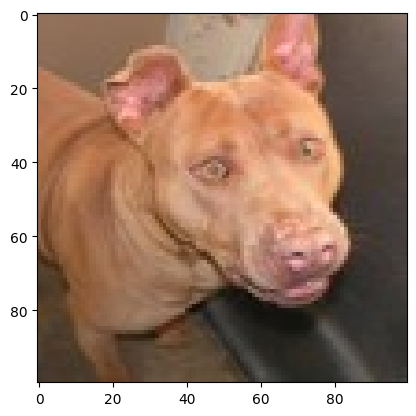

In [144]:

ran = random.randint(0, len(X_train))
plt.imshow(X_train[ran])


**Model training**

In [145]:
model = Sequential()

model.add(Conv2D(32 , (3,3) , activation='relu', input_shape = (100,100,3)),MaxPooling2D(3,3))
model.add(Conv2D(32 , (3,3) , activation='relu'),MaxPooling2D(3,3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [146]:
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [147]:
model.fit(X_train,y_train,epochs=5,batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.5002 - loss: 1.6342
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.5348 - loss: 0.6691
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.6941 - loss: 0.7038
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.8335 - loss: 0.4207
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.9287 - loss: 0.2352


**#Evavulate**

In [ ]:
model.evaluate(X_test,y_test)

**Model predictions**

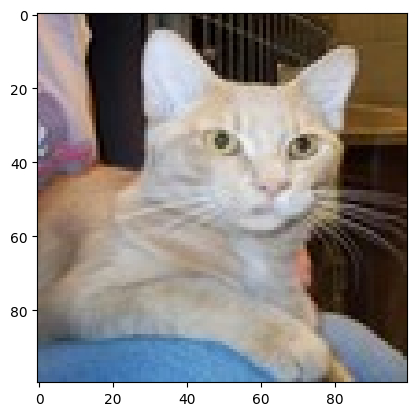

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
The predicted animal is :  Cat


In [188]:
rand  = random.randint(1,len(X_test))
plt.imshow(X_test[rand,:])
plt.show()

y_pred = model.predict(X_test[rand,:].reshape(1,100,100,3))

def hell(y_pred):
  if y_pred < 0.5:
    return "Dog"
  else:
    return "Cat"

pred = hell(y_pred)
print("The predicted animal is : ",pred)
